In [5]:
#importando as bibliotecas para cálculo e criação de visualização gráfica
#%matplotlib inline comando para abrir gráficos no mesmo notebook que estou trabalhando

import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.express as px

dados = pd.read_csv('C:\\Users\\laury\\Downloads\\analisar-dados\\datatran2019.csv', encoding='latin-1', sep = ';')
dados.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,182210.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,...,0,0,0,4,1,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182211.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,...,0,0,0,1,1,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR
2,182212.0,2019-01-01,terça-feira,00:45:00,SC,101.0,16,GARUVA,Animais na Pista,Colisão com objeto estático,...,0,0,0,1,1,"-26,1216","-48,8826",SR-SC,DEL8/3,UOP01/SC
3,182214.0,2019-01-01,terça-feira,00:00:00,CE,20.0,"429,5",FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,...,1,0,0,1,1,"-3,76999","-38,670063",SR-CE,DEL16/1,UOP02/CE
4,182215.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,...,1,1,0,1,2,"-19,7609","-43,0306",SR-MG,DEL4/3,UOP01/MG


In [6]:
#Retorna a quantidade de linhas e colunas, dimensão da base
dados.shape

(67446, 30)

In [7]:
# pedido para remover as duplicatas, no caso não há
dados = dados.drop_duplicates()
dados.shape

(67446, 30)

In [8]:
#verificar qtde valores nulos existentes e retorna em sumário
dados.isnull().sum()

id                           0
data_inversa                 0
dia_semana                   0
horario                      0
uf                           0
br                          95
km                          95
municipio                    0
causa_acidente               0
tipo_acidente                0
classificacao_acidente       0
fase_dia                     0
sentido_via                  0
condicao_metereologica       0
tipo_pista                   0
tracado_via                  0
uso_solo                     0
pessoas                      0
mortos                       0
feridos_leves                0
feridos_graves               0
ilesos                       0
ignorados                    0
feridos                      0
veiculos                     0
latitude                     0
longitude                    0
regional                     0
delegacia                    0
uop                       3440
dtype: int64

In [9]:
#trabalhando os dados = criando colunas para marcar colunas que tinham valores nulos 
#dados[''] = np.where(dados[''].isnull(), 'null', 'n/a')

dados['uop'] = np.where(dados['uop'].isnull(), 'null', 'n/a')

# verificando a base
dados.head()

#Aqui temos o código para criar as colunas de validação se há ou não valores nulos. 
#Isso é importante para manter um histórico das alterações realizadas na base.

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,182210.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,...,0,0,0,4,1,"-23,46052014","-46,48772478",SR-SP,DEL6/1,n/a
1,182211.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,...,0,0,0,1,1,"-25,05533957","-50,22776753",SR-PR,DEL7/3,n/a
2,182212.0,2019-01-01,terça-feira,00:45:00,SC,101.0,16,GARUVA,Animais na Pista,Colisão com objeto estático,...,0,0,0,1,1,"-26,1216","-48,8826",SR-SC,DEL8/3,n/a
3,182214.0,2019-01-01,terça-feira,00:00:00,CE,20.0,"429,5",FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,...,1,0,0,1,1,"-3,76999","-38,670063",SR-CE,DEL16/1,n/a
4,182215.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,...,1,1,0,1,2,"-19,7609","-43,0306",SR-MG,DEL4/3,n/a


In [10]:
#verificar retorno da base após alteração:

dados.isnull().sum()

id                         0
data_inversa               0
dia_semana                 0
horario                    0
uf                         0
br                        95
km                        95
municipio                  0
causa_acidente             0
tipo_acidente              0
classificacao_acidente     0
fase_dia                   0
sentido_via                0
condicao_metereologica     0
tipo_pista                 0
tracado_via                0
uso_solo                   0
pessoas                    0
mortos                     0
feridos_leves              0
feridos_graves             0
ilesos                     0
ignorados                  0
feridos                    0
veiculos                   0
latitude                   0
longitude                  0
regional                   0
delegacia                  0
uop                        0
dtype: int64

In [11]:
#exibir títulos das colunas e suas informações, como tipo de dados 

dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67446 entries, 0 to 67445
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      67446 non-null  float64
 1   data_inversa            67446 non-null  object 
 2   dia_semana              67446 non-null  object 
 3   horario                 67446 non-null  object 
 4   uf                      67446 non-null  object 
 5   br                      67351 non-null  float64
 6   km                      67351 non-null  object 
 7   municipio               67446 non-null  object 
 8   causa_acidente          67446 non-null  object 
 9   tipo_acidente           67446 non-null  object 
 10  classificacao_acidente  67446 non-null  object 
 11  fase_dia                67446 non-null  object 
 12  sentido_via             67446 non-null  object 
 13  condicao_metereologica  67446 non-null  object 
 14  tipo_pista              67446 non-null

In [12]:
#Estatísticas Descritivas >> Retorna medidas de tendência central
#exibe dados estatísticos da base
#Quantidade, média, desvio padrão, valor mínimo, 25% da coluna, 50% da coluna (média), 75% da coluna e valor máximo

dados.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,67446.000000,67351.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000
mean,221684.776666,215.341702,2.405969,0.079071,0.897014,0.275376,1.017614,0.136895,1.172390,1.661344
std,22444.365650,132.006891,1.979497,0.322652,1.136673,0.625602,1.506529,0.405994,1.268847,0.726134
min,182210.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,202254.250000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,221577.500000,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,241145.750000,343.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,266627.000000,495.000000,74.000000,7.000000,43.000000,22.000000,62.000000,10.000000,49.000000,14.000000


In [13]:
#Alternar colunas e linhas - outra visualização da base
#Exibe 5 registros:

dados.sample(5).T

,45689,1172,45265,10577,66614
id,235288.0,184101.0,234818.0,195127.0,259313.0
data_inversa,2019-09-13,2019-01-08,2019-09-11,2019-03-04,2019-12-28
dia_semana,sexta-feira,terça-feira,quarta-feira,segunda-feira,sábado
horario,18:00:00,22:40:00,22:00:00,07:30:00,14:15:00
uf,MG,DF,MS,MS,MG
br,381.0,20.0,163.0,267.0,40.0
km,"557,5","19,4","256,4","170,1",527
municipio,ITAGUARA,BRASILIA,DOURADOS,NOVA ALVORADA DO SUL,CONTAGEM
causa_acidente,Desobediência às normas de trânsito pelo condutor,Falta de Atenção do Pedestre,Falta de Atenção à Condução,Desobediência às normas de trânsito pelo condutor,Velocidade Incompatível
tipo_acidente,Colisão lateral,Atropelamento de Pedestre,Colisão traseira,Tombamento,Saída de leito carroçável


In [14]:
#Alternar colunas e linhas - outra visualização da base
#Exibe 5 primeiros registros:

dados[0:5].T

,0,1,2,3,4
id,182210.0,182211.0,182212.0,182214.0,182215.0
data_inversa,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01
dia_semana,terça-feira,terça-feira,terça-feira,terça-feira,terça-feira
horario,01:30:00,01:30:00,00:45:00,00:00:00,01:00:00
uf,SP,PR,SC,CE,MG
br,116.0,373.0,101.0,20.0,381.0
km,218,"177,3",16,"429,5",327
municipio,GUARULHOS,PONTA GROSSA,GARUVA,FORTALEZA,NOVA ERA
causa_acidente,Falta de Atenção à Condução,Falta de Atenção à Condução,Animais na Pista,Ingestão de Substâncias Psicoativas,Falta de Atenção à Condução
tipo_acidente,Colisão com objeto estático,Colisão traseira,Colisão com objeto estático,Colisão com objeto estático,Colisão transversal


In [15]:
#Exibe 5 últimos registros: (linhas)

dados.tail()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
67441,266255.0,2019-10-07,segunda-feira,09:10:00,ES,101.0,"270,5",SERRA,Falta de Atenção à Condução,Tombamento,...,1,1,0,1,2,"-20,23107","-40,27387",SR-ES,DEL12/2,n/a
67442,266406.0,2019-11-25,segunda-feira,07:20:00,PR,116.0,125,FAZENDA RIO GRANDE,Falta de Atenção à Condução,Colisão lateral,...,0,1,1,1,2,"-25,59505","-49,31631",SR-PR,DEL7/1,n/a
67443,266434.0,2019-06-03,segunda-feira,19:00:00,CE,222.0,"1,4",CAUCAIA,Não guardar distância de segurança,Colisão traseira,...,1,1,0,1,2,"-3,736507","-38,65337",SR-CE,DEL16/1,n/a
67444,266573.0,2019-07-13,sábado,19:35:00,PR,373.0,425,CANDOI,Defeito Mecânico no Veículo,Saída de leito carroçável,...,1,0,0,1,1,"-25,7118","-52,18374",SR-PR,DEL7/3,n/a
67445,266627.0,2019-10-22,terça-feira,20:20:00,BA,324.0,608,SIMOES FILHO,Defeito na Via,Queda de ocupante de veículo,...,0,0,0,1,1,"-12,78156","-38,41656",SR-BA,DEL10/1,n/a


In [16]:
#Alternar colunas e linhas - outra visualização da base
#Exibe as linhas solicitadas:

dados[200:300].T

,200,201,202,203,204,205,206,207,208,209,...,290,291,292,293,294,295,296,297,298,299
id,182448.0,182449.0,182450.0,182451.0,182452.0,182455.0,182457.0,182458.0,182459.0,182460.0,...,182573.0,182575.0,182576.0,182577.0,182578.0,182579.0,182580.0,182581.0,182583.0,182584.0
data_inversa,2019-01-02,2019-01-01,2019-01-02,2019-01-02,2019-01-02,2019-01-02,2019-01-01,2019-01-02,2019-01-02,2019-01-02,...,2019-01-02,2019-01-02,2019-01-02,2019-01-02,2019-01-02,2019-01-02,2019-01-02,2019-01-02,2019-01-02,2019-01-02
dia_semana,quarta-feira,terça-feira,quarta-feira,quarta-feira,quarta-feira,quarta-feira,terça-feira,quarta-feira,quarta-feira,quarta-feira,...,quarta-feira,quarta-feira,quarta-feira,quarta-feira,quarta-feira,quarta-feira,quarta-feira,quarta-feira,quarta-feira,quarta-feira
horario,07:50:00,16:42:00,08:05:00,07:35:00,08:20:00,08:00:00,19:00:00,07:30:00,08:50:00,09:10:00,...,17:15:00,16:00:00,16:40:00,16:30:00,18:45:00,18:45:00,18:00:00,16:30:00,16:40:00,19:30:00
uf,RS,BA,MG,RS,RS,MG,RJ,RS,MG,PR,...,SC,RJ,SP,PB,SP,MG,SC,RJ,PB,SC
br,158.0,116.0,381.0,386.0,116.0,40.0,493.0,290.0,262.0,376.0,...,101.0,40.0,116.0,104.0,116.0,381.0,101.0,101.0,230.0,280.0
km,"333,7",675,"775,1",365,"295,4","42,2",81,"41,1",101,"176,4",...,"35,7",116,"417,2",100,285,"528,3",147,"46,9","396,4","21,3"
municipio,SANTA MARIA,JEQUIE,CAMPANHA,FAZENDA VILANOVA,GUAIBA,PARACATU,JAPERI,SANTO ANTONIO DA PATRULHA,ABRE CAMPO,MARINGA,...,JOINVILLE,DUQUE DE CAXIAS,JUQUIA,SAO SEBASTIAO DE LAGOA DE ROCA,ITAPECERICA DA SERRA,BRUMADINHO,ITAPEMA,CAMPOS DOS GOYTACAZES,SAO BENTINHO,ARAQUARI
causa_acidente,Falta de Atenção à Condução,Falta de Atenção do Pedestre,Falta de Atenção à Condução,Condutor Dormindo,Defeito na Via,Falta de Atenção à Condução,Falta de Atenção à Condução,Falta de Atenção à Condução,Defeito Mecânico no Veículo,Pista Escorregadia,...,Desobediência às normas de trânsito pelo condutor,Falta de Atenção à Condução,Falta de Atenção à Condução,Falta de Atenção à Condução,Falta de Atenção à Condução,Velocidade Incompatível,Falta de Atenção à Condução,Falta de Atenção à Condução,Mal Súbito,Falta de Atenção à Condução
tipo_acidente,Colisão transversal,Atropelamento de Pedestre,Saída de leito carroçável,Colisão traseira,Tombamento,Colisão transversal,Saída de leito carroçável,Colisão traseira,Incêndio,Queda de ocupante de veículo,...,Queda de ocupante de veículo,Capotamento,Colisão com objeto estático,Colisão traseira,Colisão traseira,Tombamento,Colisão transversal,Colisão transversal,Queda de ocupante de veículo,Colisão transversal


In [17]:
#Selecionando Múltiplas Colunas
#exibir tabela com colunas escolhidas/selecionadas

dados[['uf', 'br', 'causa_acidente', 'classificacao_acidente', 'condicao_metereologica' ,'mortos', 'feridos_leves', 'feridos_graves', 'latitude', 'longitude']]

,uf,br,causa_acidente,classificacao_acidente,condicao_metereologica,mortos,feridos_leves,feridos_graves,latitude,longitude
0,SP,116.0,Falta de Atenção à Condução,Com Vítimas Feridas,Céu Claro,0,4,0,"-23,46052014","-46,48772478"
1,PR,373.0,Falta de Atenção à Condução,Com Vítimas Feridas,Nublado,0,1,0,"-25,05533957","-50,22776753"
2,SC,101.0,Animais na Pista,Com Vítimas Feridas,Céu Claro,0,1,0,"-26,1216","-48,8826"
3,CE,20.0,Ingestão de Substâncias Psicoativas,Com Vítimas Feridas,Nublado,0,0,1,"-3,76999","-38,670063"
4,MG,381.0,Falta de Atenção à Condução,Com Vítimas Feridas,Nublado,0,0,1,"-19,7609","-43,0306"
...,...,...,...,...,...,...,...,...,...,...
67441,ES,101.0,Falta de Atenção à Condução,Com Vítimas Feridas,Céu Claro,0,0,1,"-20,23107","-40,27387"
67442,PR,116.0,Falta de Atenção à Condução,Com Vítimas Feridas,Céu Claro,0,1,0,"-25,59505","-49,31631"
67443,CE,222.0,Não guardar distância de segurança,Com Vítimas Feridas,Céu Claro,0,0,1,"-3,736507","-38,65337"
67444,PR,373.0,Defeito Mecânico no Veículo,Com Vítimas Feridas,Ignorado,0,0,1,"-25,7118","-52,18374"


In [18]:
#Selecionando Múltiplas Colunas
#exibir tabela com colunas escolhidas/selecionadas
#guardar como nova tabela

dados_selecionados = dados[['uf', 'br', 'causa_acidente', 'classificacao_acidente', 'condicao_metereologica' ,'mortos', 'feridos_leves', 'feridos_graves', 'latitude', 'longitude']]

In [19]:
#Operações de Agregamento

dados_select1 = dados_selecionados

dados_select1['causa_acidente'].value_counts()

Falta de Atenção à Condução                                                       24992
Desobediência às normas de trânsito pelo condutor                                  8098
Velocidade Incompatível                                                            6028
Ingestão de Álcool                                                                 5419
Não guardar distância de segurança                                                 4214
Defeito Mecânico no Veículo                                                        3732
Condutor Dormindo                                                                  2483
Pista Escorregadia                                                                 2186
Falta de Atenção do Pedestre                                                       1971
Animais na Pista                                                                   1527
Ultrapassagem Indevida                                                             1173
Defeito na Via                  

<AxesSubplot:>

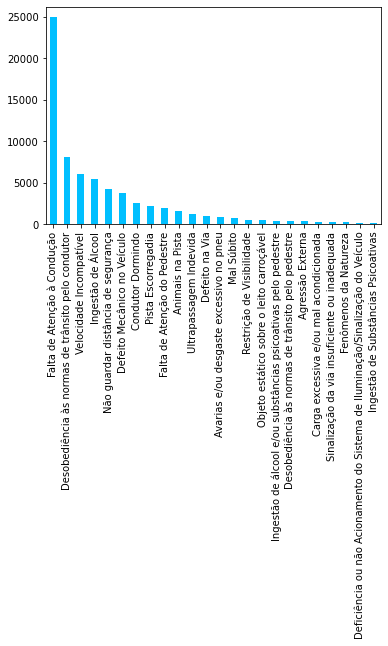

In [51]:
#gráfico de barras vertical

dados_select1['causa_acidente'].value_counts().plot.bar(color='#00BFFF')

<AxesSubplot:title={'center':'Gráfico de Barras'}>

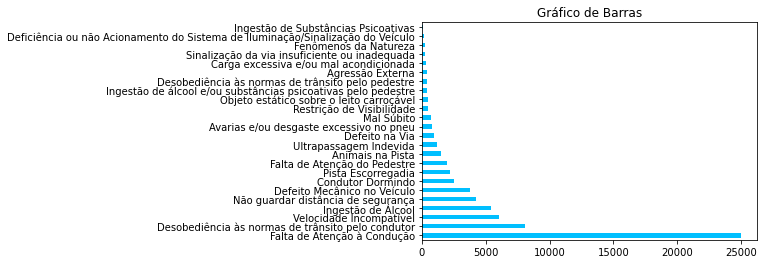

In [50]:
#graficos > barras horizontal

grafico1 = dados_select1['causa_acidente'].value_counts()

grafico1.plot( 
  x = 'causa acidente',  
  kind = 'barh',  
  stacked = True,  
  title = 'Gráfico de Barras',  
    color='#00BFFF', 
  mark_right = True)

<AxesSubplot:title={'center':'Gráfico de Barras'}>

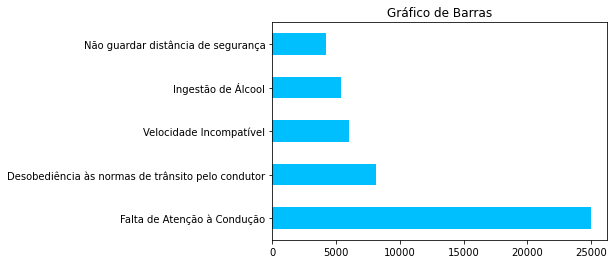

In [56]:
#graficos > barras horizontal
#destaque para os 5 registros mais 

grafico2 = dados_select1['causa_acidente'].value_counts().head()

grafico2.plot( 
  x = 'causa acidente',  
  kind = 'barh',  
  stacked = True,  
  title = 'Gráfico de Barras',  
    color='#00BFFF',
  mark_right = True)

In [34]:
#analise 2
#Operações de Agregamento

dados_select2 = dados_selecionados

dados_select2['classificacao_acidente'].value_counts()

Com Vítimas Feridas    51183
Sem Vítimas            11671
Com Vítimas Fatais      4592
Name: classificacao_acidente, dtype: int64

In [41]:
#lib plot > pizza
dados_x= ['Com Vítimas Feridas', 'Com Vítimas Fatais', 'Sem Vítimas' ]
dados_y= ['51183', '4592', '11671']

fig = px.pie(names=dados_x, values= dados_y, width=700, height=300)
fig.show()

In [60]:
#lib plot > barras vertical
#gráfico interativo

dados_x= ['Com Vítimas Feridas', 'Com Vítimas Fatais', 'Sem Vítimas' ]
dados_y= [51183, 4592, 11671]

fig = px.bar(x=dados_x, y=dados_y, width=400, height=500)
fig.show()

In [53]:
#lib plot > linhas
#grafico interativo
#gráfico com apenas 1 ano fica incorreto.. utilizar barras

dados_x= ['Com Vítimas Feridas', 'Com Vítimas Fatais', 'Sem Vítimas' ]
dados_y= [51183, 4592, 11671]

fig = px.line(x=dados_x, y=dados_y, title= 'Acidentes por tipo em 2019', width=700, height=300)
fig.update_yaxes(title='Qtd')
fig.show()